### Use four dimention of day to change the Stoploss/ StopProfit
- % v.s certain values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date
import sys
import cufflinks as cf
cf.go_offline()

import warnings
warnings.simplefilter(action='ignore')

c:\Users\A51857\AppData\Local\anaconda3\envs\test\lib\importlib\__init__.py:126: UserWarning:

A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.1)



In [3]:
data = pd.read_csv('Data/TXF daily Dimention.csv')
data['Date'] = pd.to_datetime(data['Date']).dt.date
data = data.dropna()
data = data.set_index('Date')
data

,Open,High,Low,Close
Date,,,,
2025-02-07,3.0,3.0,3.0,3.0
2025-02-06,2.0,2.0,2.0,2.0
2025-02-05,2.0,2.0,2.0,2.0
2025-02-04,2.0,2.0,2.0,2.0
2025-02-03,2.0,2.0,2.0,2.0
...,...,...,...,...
2019-05-15,2.0,2.0,2.0,2.0
2019-05-14,3.0,3.0,3.0,3.0
2019-05-13,3.0,3.0,3.0,3.0


In [4]:
data2 = pd.read_csv("Data/TXFC1_1min.txt")
data2['Date'] = pd.to_datetime(data2['Date']).dt.date
data2 = data2.set_index('Date')
data2 = data2[(data2.index>=date(2019,5,9))&(data2.index<=date(2025,2,7))].sort_index(ascending=True)
data2

,Time,Open,High,Low,Close,Volume
Date,,,,,,
2019-05-09,00:00:00,10901,10902,10898,10898,56
2019-05-09,00:01:00,10899,10901,10896,10898,84
2019-05-09,00:02:00,10898,10898,10895,10895,27
2019-05-09,00:03:00,10895,10896,10890,10892,178
2019-05-09,00:04:00,10891,10892,10881,10883,651
...,...,...,...,...,...,...
2025-02-07,23:55:00,23306,23308,23276,23281,0
2025-02-07,23:56:00,23286,23326,23270,23316,0
2025-02-07,23:57:00,23316,23320,23303,23304,0


In [4]:
df = data2[['Time']].copy()
dimentions = []
for i in df.index:
    try:
        dimentions.append(data.loc[i,'Open'])
    except:
        dimentions.append(np.nan)
    # dimentions.append(data.loc[i,'Open'])
df['Open']=dimentions
df['High']=dimentions
df['Low']= dimentions
df['Close'] = dimentions
df
    

,Time,Open,High,Low,Close
Date,,,,,
2019-05-09,00:00:00,3.0,3.0,3.0,3.0
2019-05-09,00:01:00,3.0,3.0,3.0,3.0
2019-05-09,00:02:00,3.0,3.0,3.0,3.0
2019-05-09,00:03:00,3.0,3.0,3.0,3.0
2019-05-09,00:04:00,3.0,3.0,3.0,3.0
...,...,...,...,...,...
2025-02-07,23:55:00,3.0,3.0,3.0,3.0
2025-02-07,23:56:00,3.0,3.0,3.0,3.0
2025-02-07,23:57:00,3.0,3.0,3.0,3.0


In [5]:
# df.to_csv('TXF_Dimention.csv')

In [5]:
df_dim = data[['Open']]
df_dim.columns = ['Dim']
df_dim = df_dim.sort_index(ascending=True)
df_dim['Avg'] = df_dim['Dim'].shift(1).rolling(3).mean()
df_dim.tail(3)

,Dim,Avg
Date,,
2025-02-05,2.0,2.333333
2025-02-06,2.0,2.000000
2025-02-07,3.0,2.000000


In [6]:
df_profit = pd.read_csv('Data/Profolio.csv')
df_profit['Date'] = pd.to_datetime(df_profit['Date']).dt.date
df_profit = df_profit.set_index('Date')
df_profit = df_profit[~df_profit.index.duplicated(keep='first')]
df_profit

,DualThrust,BreakPrice,BBI,Cloud,DMI,RVI
Date,,,,,,
2025-01-13,0.00,0.00,0.00,0.00,0.00,0.00
2025-01-10,-6699.94,0.00,90268.22,17557.73,-47245.82,0.00
2025-01-09,0.00,50667.12,158167.21,-76285.06,242424.49,-124459.58
2025-01-08,0.00,14620.46,-10629.56,-18906.43,148566.11,18440.78
2025-01-07,0.00,-4022.09,-109965.50,43225.00,54872.32,6357.55
...,...,...,...,...,...,...
2019-05-12,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-11,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-05,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
df_dim['P1'] = df_profit['DualThrust']
df_dim['P2'] = df_profit['BreakPrice']
df_dim['P3'] = df_profit['BBI']
df_dim['P4'] = df_profit['Cloud']
df_dim['P5'] = df_profit['DMI']
df_dim['P6'] = df_profit['RVI']
df_dim = df_dim.sort_index(ascending=True)
df_dim = df_dim.dropna()
df_dim


,Dim,Avg,P1,P2,P3,P4,P5,P6
Date,,,,,,,,
2019-05-14,3.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-15,2.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-16,2.0,2.666667,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-17,3.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-20,2.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2025-01-07,3.0,2.333333,0.00,-4022.09,-109965.50,43225.00,54872.32,6357.55
2025-01-08,2.0,2.666667,0.00,14620.46,-10629.56,-18906.43,148566.11,18440.78
2025-01-09,2.0,2.666667,0.00,50667.12,158167.21,-76285.06,242424.49,-124459.58


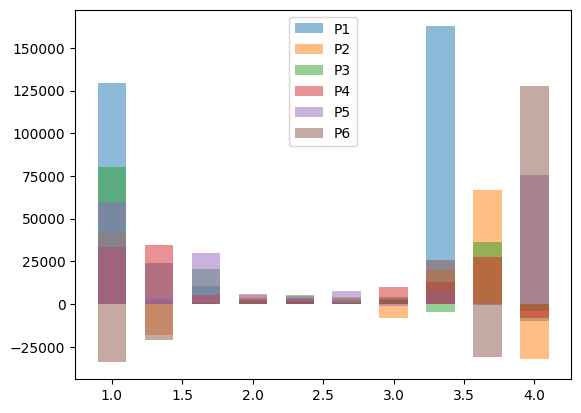

In [8]:
df_score = pd.DataFrame()
for i in df_dim.columns[2:]:
    df_score[i] = df_dim.groupby('Avg')[i].mean()
    plt.bar(df_score.index,df_score[i],width=0.2,alpha=0.5,label=i)
plt.legend()
plt.show()

In [9]:
df_p = pd.DataFrame()
for i in df_dim.columns[2:]:
    df_p[i]=df_dim[i].cumsum()
df_p['Profolio'] = df_p.mean(axis=1)
df_p

,P1,P2,P3,P4,P5,P6,Profolio
Date,,,,,,,
2019-05-14,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
2019-05-15,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
2019-05-16,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
2019-05-17,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
2019-05-20,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
...,...,...,...,...,...,...,...
2025-01-07,7524204.45,3768843.05,6026395.52,5588656.82,8141747.82,3178669.62,5.704753e+06
2025-01-08,7524204.45,3783463.51,6015765.96,5569750.39,8290313.93,3197110.40,5.730101e+06
2025-01-09,7524204.45,3834130.63,6173933.17,5493465.33,8532738.42,3072650.82,5.771854e+06


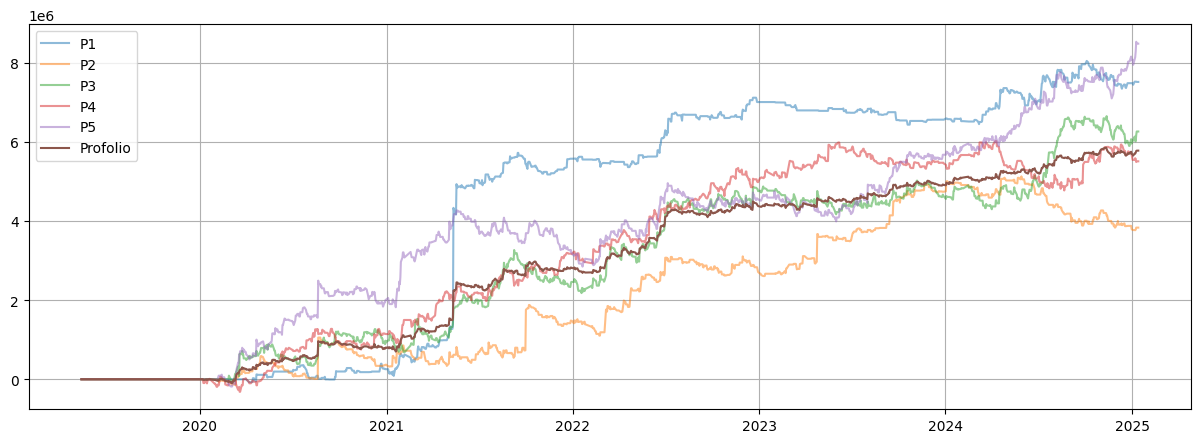

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_p[df_p.columns[:-2]],alpha=0.5,label=df_p.columns[:-2])
plt.plot(df_p['Profolio'],label='Profolio')
plt.grid()
plt.legend()
plt.show()

In [11]:
df_dim

,Dim,Avg,P1,P2,P3,P4,P5,P6
Date,,,,,,,,
2019-05-14,3.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-15,2.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-16,2.0,2.666667,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-17,3.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-20,2.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2025-01-07,3.0,2.333333,0.00,-4022.09,-109965.50,43225.00,54872.32,6357.55
2025-01-08,2.0,2.666667,0.00,14620.46,-10629.56,-18906.43,148566.11,18440.78
2025-01-09,2.0,2.666667,0.00,50667.12,158167.21,-76285.06,242424.49,-124459.58


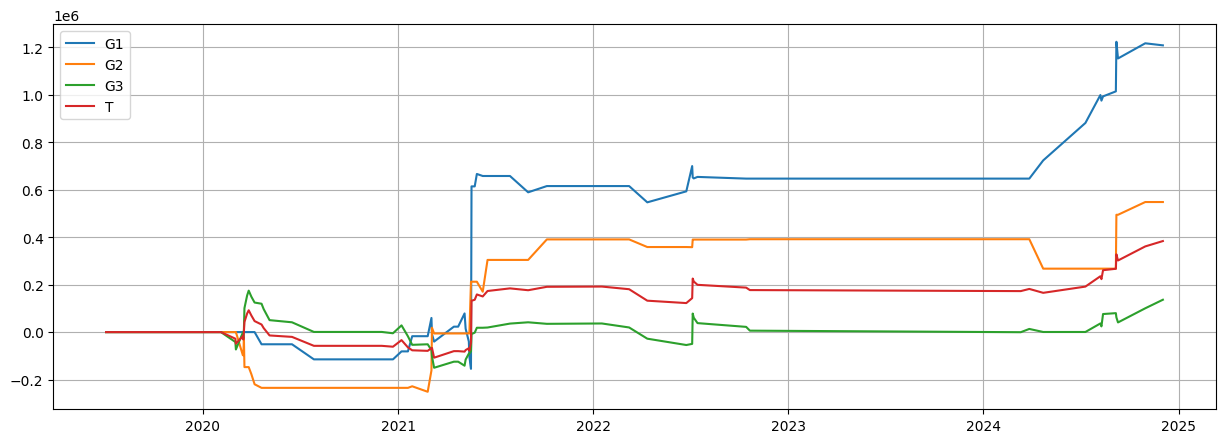

In [12]:
# group the strategy as 3 group
group1 = ['P1']
group2 = ['P4']
group3 = ['P2','P3','P5','P6']
total = ['P1','P2','P3','P4','P5','P6']

# if 前一日位於第一象限則今日Profit
df_test1 = df_dim[df_dim['Dim'].shift(1)==1]
df_test1['G1'] = df_test1[group1].mean(axis=1).cumsum()
df_test1['G2'] = df_test1[group2].mean(axis=1).cumsum()
df_test1['G3'] = df_test1[group3].mean(axis=1).cumsum()
df_test1['T'] = df_test1[total].mean(axis=1).cumsum()
df_score = pd.DataFrame()
plt.figure(figsize=(15,5))
plt.plot(df_test1[df_test1.columns[-4:]],label=df_test1.columns[-4:])
# plt.plot(df_test1['Profolio'],label='Profolio')
plt.grid()
plt.legend()
plt.show()


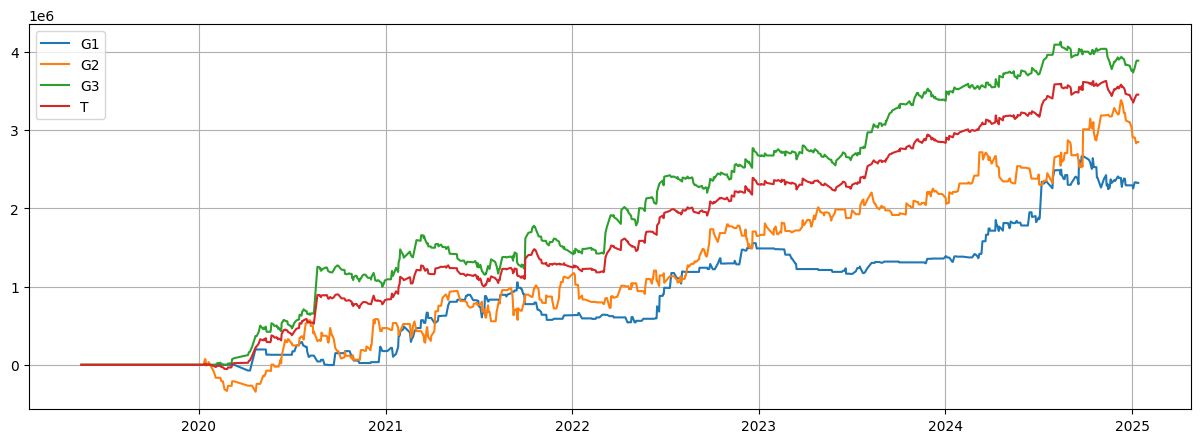

In [13]:
# if 前一日位於第二象限則今日Profit
df_test2 = df_dim[df_dim['Dim'].shift(1)==2]
df_test2['G1'] = df_test2[group1].mean(axis=1).cumsum()
df_test2['G2'] = df_test2[group2].mean(axis=1).cumsum()
df_test2['G3'] = df_test2[group3].mean(axis=1).cumsum()
df_test2['T'] = df_test2[total].mean(axis=1).cumsum()
df_score = pd.DataFrame()
plt.figure(figsize=(15,5))
plt.plot(df_test2[df_test2.columns[-4:]],label=df_test2.columns[-4:])
# plt.plot(df_test2['Profolio'],label='Profolio')
plt.grid()
plt.legend()
plt.show()

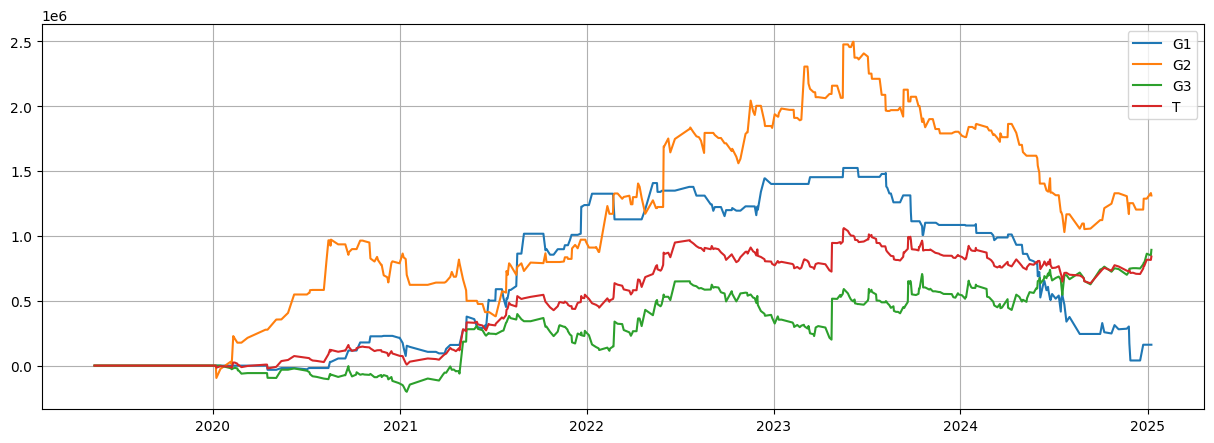

In [14]:
# if 前一日位於第三象限則今日Profit
df_test2 = df_dim[df_dim['Dim'].shift(1)==3]
df_test2['G1'] = df_test2[group1].mean(axis=1).cumsum()
df_test2['G2'] = df_test2[group2].mean(axis=1).cumsum()
df_test2['G3'] = df_test2[group3].mean(axis=1).cumsum()
df_test2['T'] = df_test2[total].mean(axis=1).cumsum()
df_score = pd.DataFrame()
plt.figure(figsize=(15,5))
plt.plot(df_test2[df_test2.columns[-4:]],label=df_test2.columns[-4:])
# plt.plot(df_test2['Profolio'],label='Profolio')
plt.grid()
plt.legend()
plt.show()

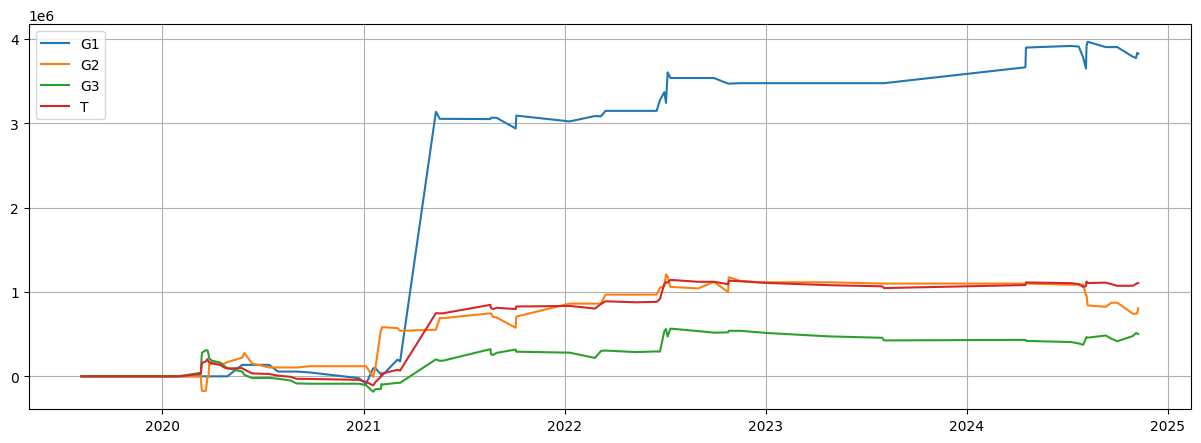

In [15]:
# if 前一日位於第四象限則今日Profit
df_test2 = df_dim[df_dim['Dim'].shift(1)==4]
df_test2['G1'] = df_test2[group1].mean(axis=1).cumsum()
df_test2['G2'] = df_test2[group2].mean(axis=1).cumsum()
df_test2['G3'] = df_test2[group3].mean(axis=1).cumsum()
df_test2['T'] = df_test2[total].mean(axis=1).cumsum()
df_score = pd.DataFrame()
plt.figure(figsize=(15,5))
plt.plot(df_test2[df_test2.columns[-4:]],label=df_test2.columns[-4:])
# plt.plot(df_test2['Profolio'],label='Profolio')
plt.grid()
plt.legend()
plt.show()

### **檢查不同週期各象限的轉換次數**

In [ ]:
def check_freq(df:pd.DataFrame,days:int):
    '''
    days(int): days of the frequency
    '''
    for i in range(1,5):
        for j in range(1,5):
            df.loc[str(i),str(j)] = len(df_dim[(df_dim['Dim'].shift(days)==i)&(df_dim['Dim']==j)])
    df['Total'] = df.sum(axis=1)
    df.loc['1','Unchange'] = df.loc['1','1']/df.loc['1','Total']*100
    df.loc['2','Unchange'] = df.loc['2','2']/df.loc['2','Total']*100
    df.loc['3','Unchange'] = df.loc['3','3']/df.loc['3','Total']*100
    df.loc['4','Unchange'] = df.loc['4','4']/df.loc['4','Total']*100
    total = df['Total'].sum(axis=0)
    total_unchange = df.loc['1','1']+df.loc['2','2']+df.loc['3','3']+df.loc['4','4']
    print(f'Total  Unchange : {round(total_unchange/total*100,4)} %')
    return df

In [23]:
# daily
df_daily_change = pd.DataFrame()
check_freq(df_daily_change,1)

Total  Unchange : 47.9363 %


,1,2,3,4,Total,Unchange
1,12.0,28.0,13.0,10.0,63.0,19.047619
2,22.0,499.0,255.0,41.0,817.0,61.077111
3,12.0,260.0,137.0,14.0,423.0,32.387707
4,17.0,30.0,17.0,14.0,78.0,17.948718


In [27]:
# weekly
df_weekly_change = pd.DataFrame()
check_freq(df_weekly_change,5)

Total  Unchange : 44.0813 %


,1,2,3,4,Total,Unchange
1,7.0,28.0,17.0,11.0,63.0,11.111111
2,29.0,471.0,264.0,50.0,814.0,57.862408
3,18.0,269.0,123.0,12.0,422.0,29.146919
4,9.0,46.0,17.0,6.0,78.0,7.692308


In [28]:
# Monthly
df_monthly_change = pd.DataFrame()
check_freq(df_monthly_change,20)

Total  Unchange : 43.906 %


,1,2,3,4,Total,Unchange
1,7.0,28.0,21.0,7.0,63.0,11.111111
2,38.0,467.0,258.0,42.0,805.0,58.012422
3,12.0,260.0,119.0,25.0,416.0,28.605769
4,6.0,49.0,18.0,5.0,78.0,6.410256


In [29]:
# Quater
df_q_change = pd.DataFrame()
check_freq(df_q_change,60)

Total  Unchange : 45.8396 %


,1,2,3,4,Total,Unchange
1,4.0,34.0,16.0,7.0,61.0,6.557377
2,38.0,465.0,236.0,41.0,780.0,59.615385
3,19.0,231.0,132.0,25.0,407.0,32.432432
4,1.0,44.0,24.0,5.0,74.0,6.756757


In [21]:
df_dim

,Dim,Avg,P1,P2,P3,P4,P5,P6
Date,,,,,,,,
2019-05-14,3.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-15,2.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-16,2.0,2.666667,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-17,3.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
2019-05-20,2.0,2.333333,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
2025-01-07,3.0,2.333333,0.00,-4022.09,-109965.50,43225.00,54872.32,6357.55
2025-01-08,2.0,2.666667,0.00,14620.46,-10629.56,-18906.43,148566.11,18440.78
2025-01-09,2.0,2.666667,0.00,50667.12,158167.21,-76285.06,242424.49,-124459.58


In [82]:
days = 20
df_dim['weight'] = np.where((df_dim['Dim'].shift(days)==1)|(df_dim['Dim'].shift(days)==4),1,2)
## Change time ## 
df_p = df_dim[['weight','P1','P2','P3','P4','P5','P6']]
df_p['profolio_org'] = (df_p['P1']+df_p['P2']+df_p['P3']+df_p['P4']+df_p['P5']+df_p['P6'])/6
df_p['profolio'] = np.where(df_p['weight']==1,(df_p['P1']*3+df_p['P2']+df_p['P3']+df_p['P4']*3+df_p['P5']+df_p['P6'])/10,(df_p['P1']+df_p['P2']*2+df_p['P3']*2+df_p['P4']+df_p['P5']*2+df_p['P6']*2)/10)
df_p.index = pd.to_datetime(df_p.index)
df_p = df_p.loc['2020-01-01':]
df_p.iloc[0] = [0,0,0,0,0,0,0,0,0]
df_p = df_p.sort_index(ascending=True)
##--------------##
df_p['profolio_org_acc'] = df_p['profolio_org'].cumsum()
df_p['profolio_acc'] = df_p['profolio'].cumsum()
df_p.head(3)

,weight,P1,P2,P3,P4,P5,P6,profolio_org,profolio,profolio_org_acc,profolio_acc
Date,,,,,,,,,,,
2020-01-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_ret = pd.concat({
    'Original Profolio':df_p['profolio_org_acc'],
    'Weighted Profolio':df_p['profolio_acc'],
    'P1':df_p['P1'].cumsum()/6,
    'P2':df_p['P2'].cumsum()/6,
    'P3':df_p['P3'].cumsum()/6,
    'P4':df_p['P4'].cumsum()/6,
    'P5':df_p['P5'].cumsum()/6,
    'P6':df_p['P6'].cumsum()/6,
},axis=1)

fig = df_ret.iplot(layout=dict(width=1000,height=500,title='Return Comparison'),asFigure=True)
fig.show()